In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score

from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

from sklearn.metrics import roc_auc_score,roc_curve

In [129]:
bank_data=pd.read_csv("DS_C12_S2_Classification_BankChurn_Data_Project.csv")
bank_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [130]:
bank_data.shape

(10000, 13)

In [131]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [132]:
bank_data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [133]:
bank_data.duplicated().sum()

0

In [134]:
bank_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [135]:
bank_data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography             11
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [136]:
bank_data.drop(["CustomerId","Surname"],axis=1,inplace=True)

In [137]:
cat_cols=[]
cont_cols=[]
for i in bank_data:
    if bank_data[i].nunique()<=20:
        cat_cols.append(i)
    else:
        cont_cols.append(i)

In [138]:
print("Categorical columns :",cat_cols)
print("Continuous columns :",cont_cols)

Categorical columns : ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
Continuous columns : ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


## EDA

In [139]:
def bar_pie(*s):
    for col in s:

        fig,ax=plt.subplots(1,2,figsize=(10,3))
        sns.countplot(y=col,data=bank_data,ax=ax[0])
        ax[0].set_title(f"quantity of {col}")

        per=bank_data[col].value_counts(normalize=True)*100
        ax[1].pie(per.values,labels=per.index,autopct="%1.1f%%")
        ax[1].set_title(f"percentage of {col}")
        plt.show()


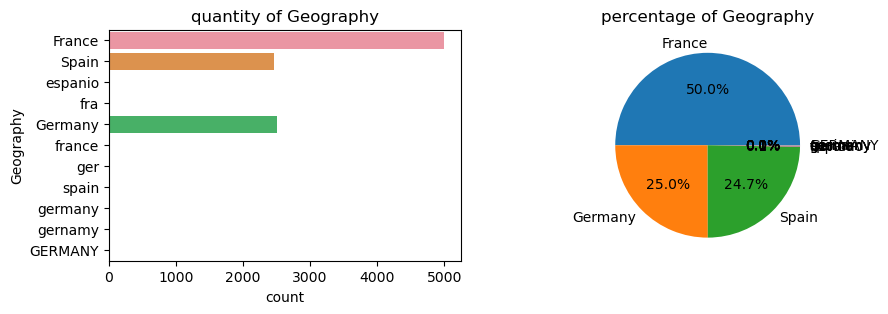

In [140]:
bar_pie("Geography")

In [141]:
bank_data["Geography"][bank_data["Geography"].str.contains("^f")]="France"
bank_data["Geography"][bank_data["Geography"].str.contains("^[se]")]="Spain"
bank_data["Geography"][bank_data["Geography"].str.contains("^g",case=False)]="Germany"

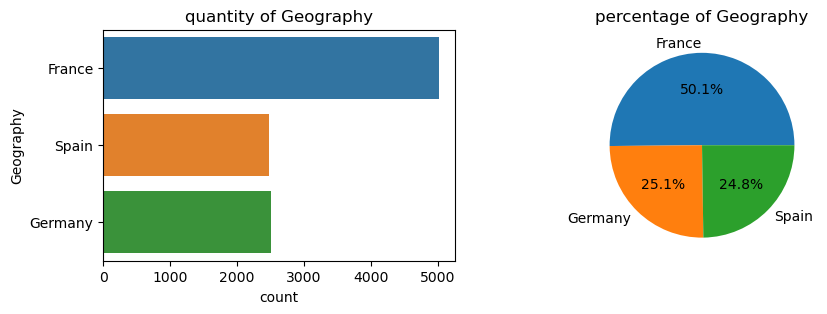

In [142]:
bar_pie("Geography")

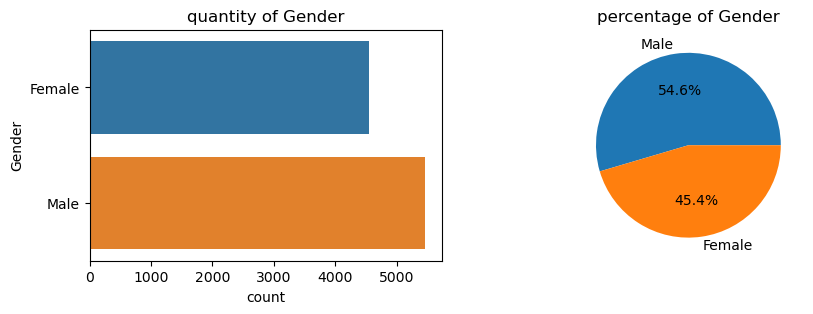

In [143]:
bar_pie("Gender")

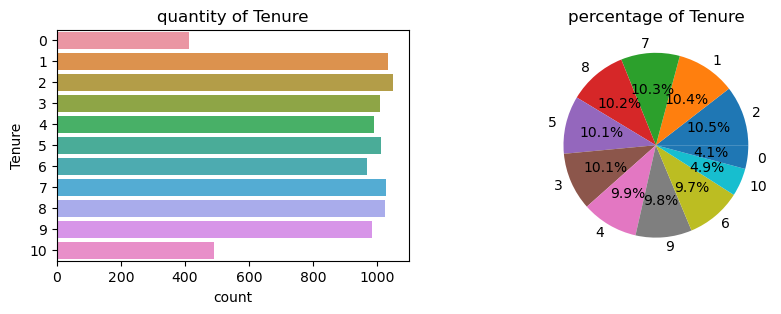

In [144]:
bar_pie("Tenure")

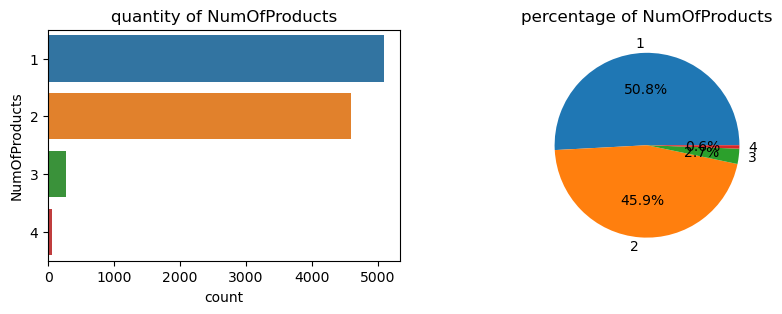

In [145]:
bar_pie("NumOfProducts")

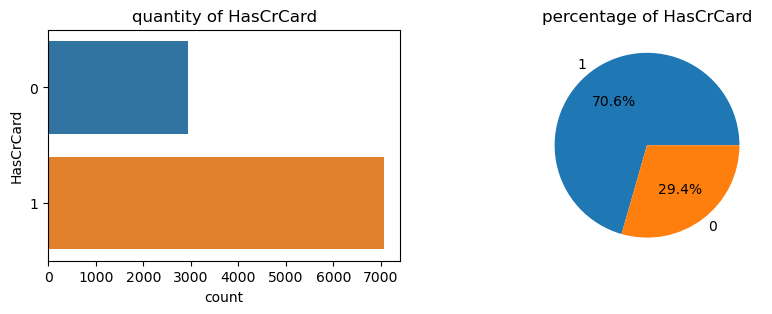

In [146]:
bar_pie("HasCrCard")

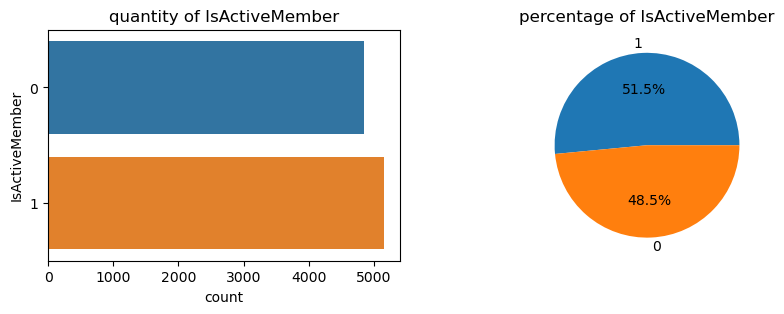

In [147]:
bar_pie("IsActiveMember")

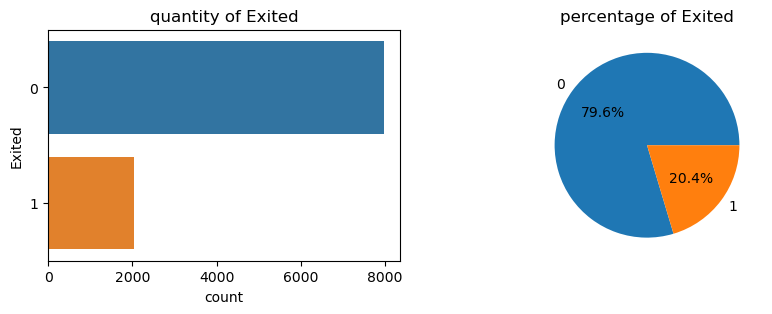

In [148]:
bar_pie("Exited")

Data is highly imbalanced, need to balance the data

In [149]:
def hist_box(*s):
    for col in s:
        values=bank_data[col].values
        fig,ax=plt.subplots(1,2,figsize=(15,4))
        sns.histplot(x=values,hue="Exited",bins=20,ax=ax[0],data=bank_data)
        ax[0].set_title(f"Distribution of {col} using histogram")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")


        sns.boxplot(y=col,x="Exited",ax=ax[1],data=bank_data)
        ax[1].set_title(f"Distribution using boxplot of {col}")
        plt.show()

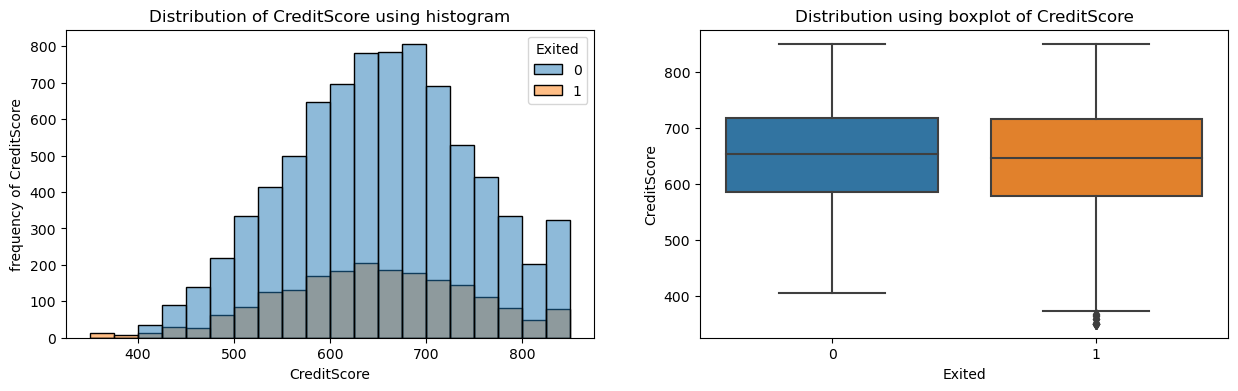

In [150]:
hist_box("CreditScore")

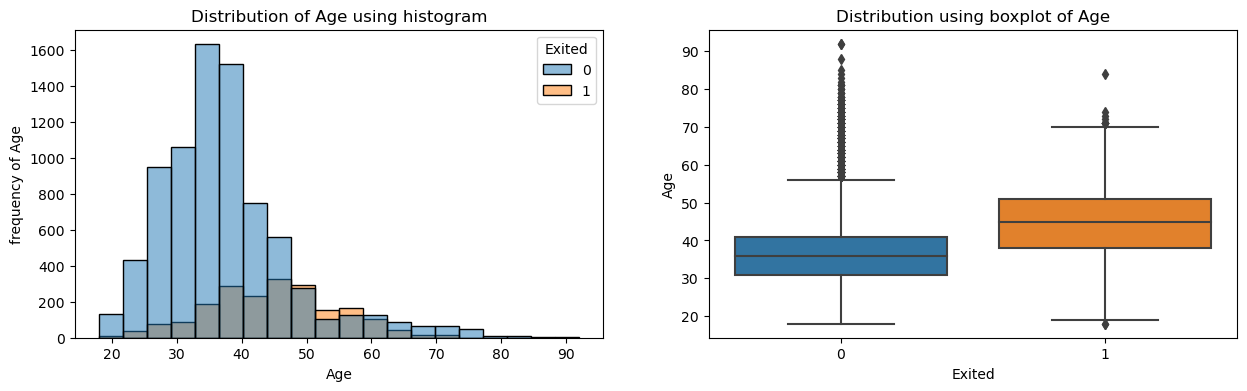

In [151]:
hist_box("Age")

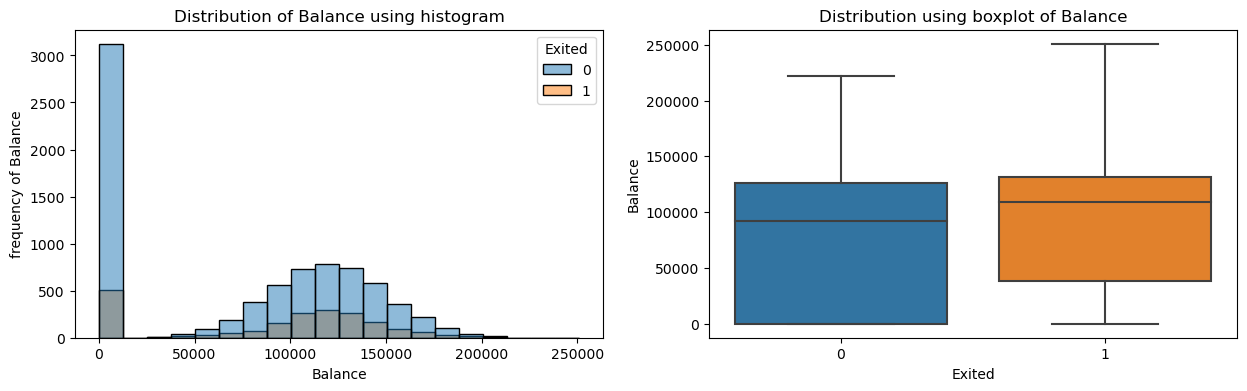

In [152]:
hist_box("Balance")

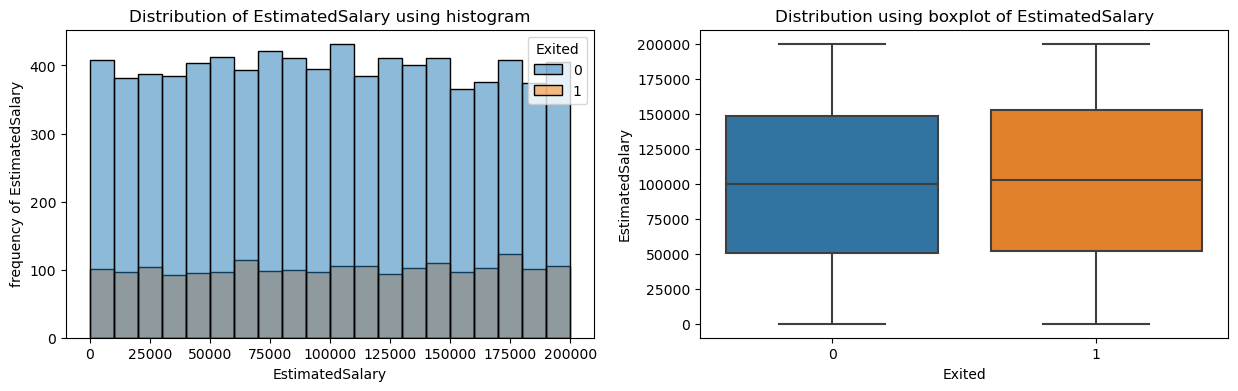

In [153]:
hist_box("EstimatedSalary")

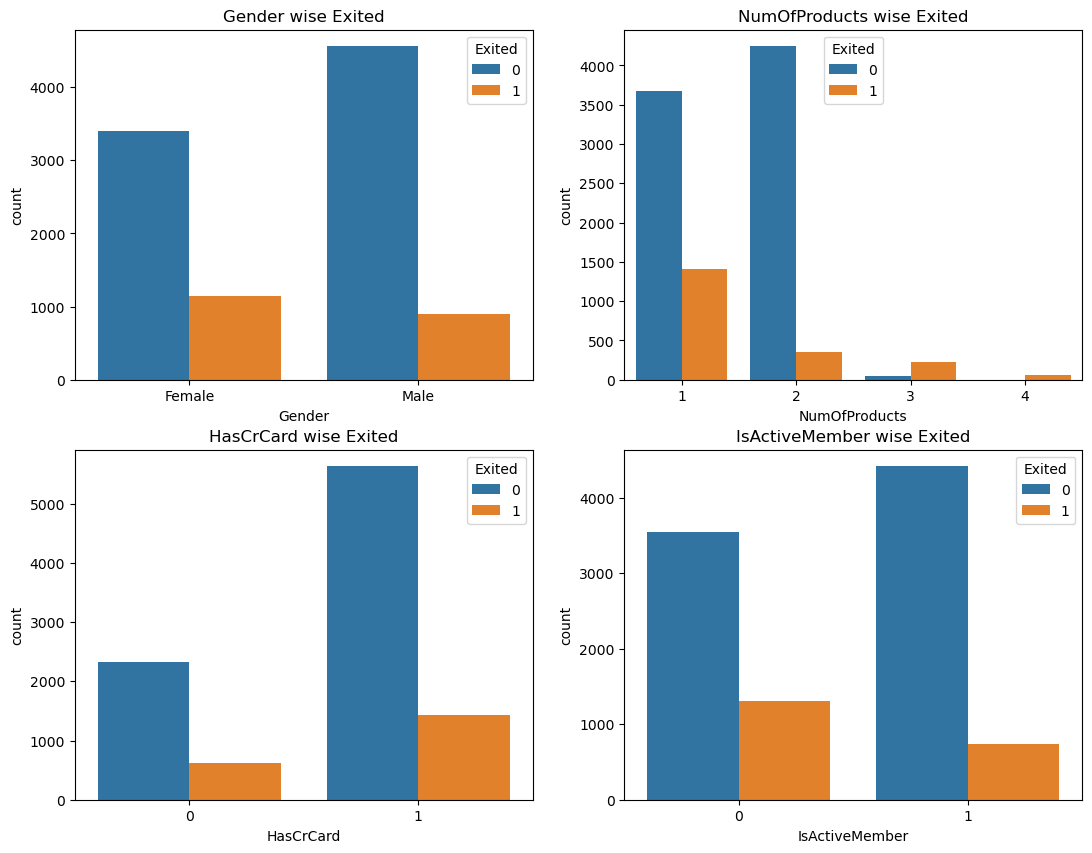

In [154]:
new=['Gender','NumOfProducts','HasCrCard','IsActiveMember']
fig,axs=plt.subplots(2,2,figsize=(13,10))
axs=axs.ravel()
j=0
for i in new:
    sns.countplot(x=i,hue="Exited",data=bank_data,ax=axs[j])
    axs[j].set_title(f"{i} wise Exited")
    j+=1
plt.show()

In [155]:
def hist_box1(*s):
    for col in s:
        values=bank_data[col].values
        fig,ax=plt.subplots(1,2,figsize=(15,4))
        sns.histplot(x=values,hue="Gender",bins=20,ax=ax[0],data=bank_data)
        ax[0].set_title(f"Distribution of {col} using histogram")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")


        sns.boxplot(y=col,x="Gender",ax=ax[1],data=bank_data)
        ax[1].set_title(f"Distribution using boxplot of {col}")
        plt.show()

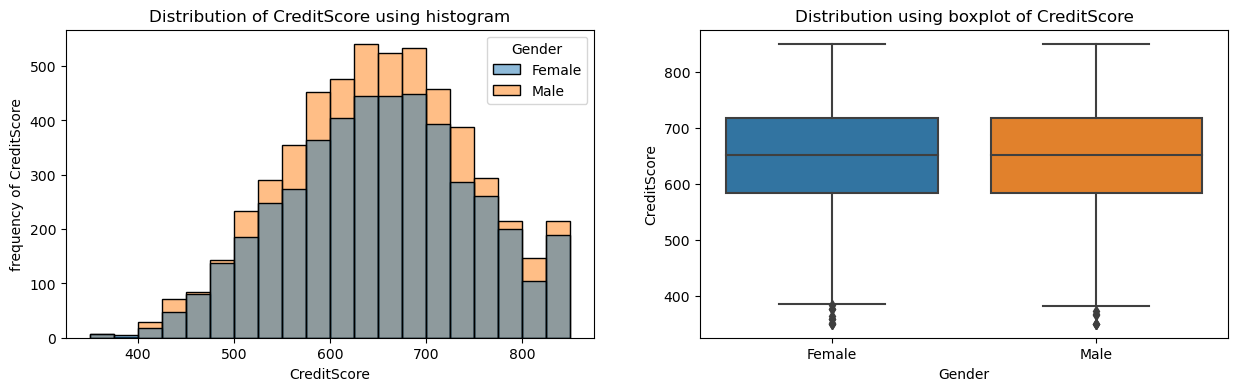

In [156]:
hist_box1("CreditScore")

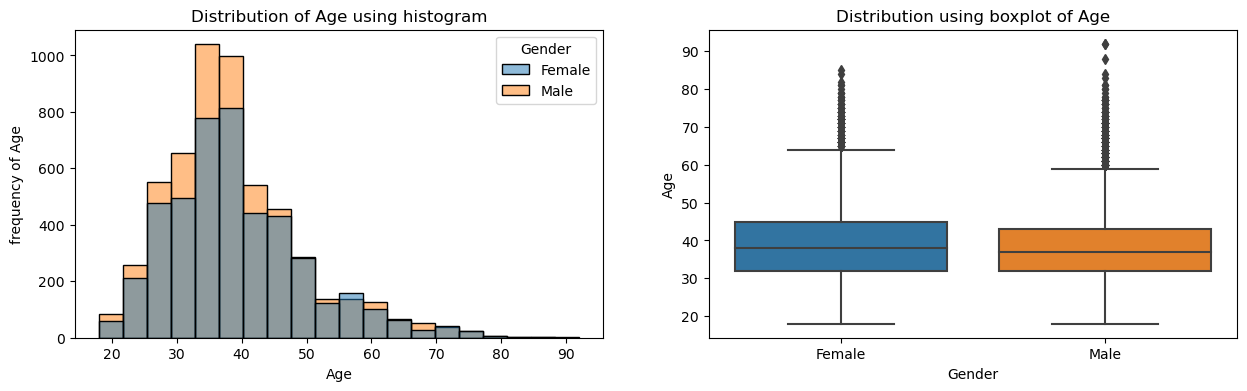

In [157]:
hist_box1("Age")

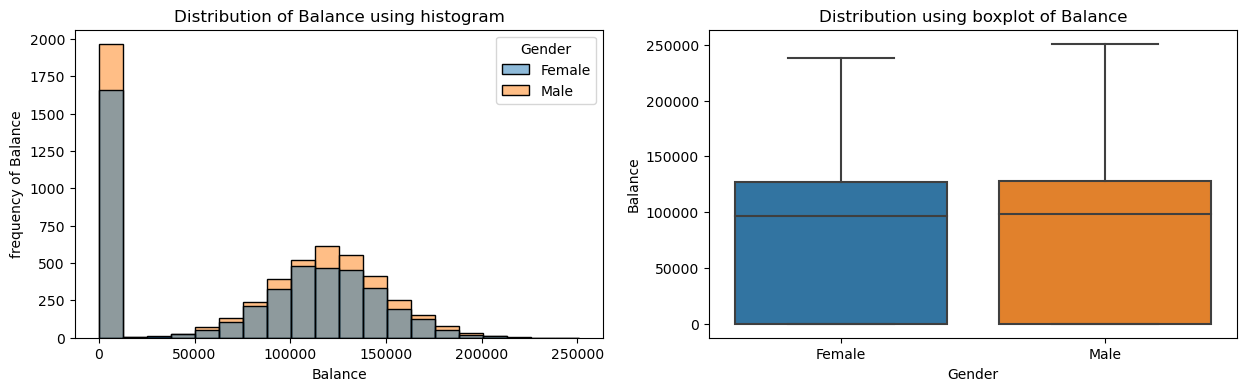

In [158]:
hist_box1("Balance")

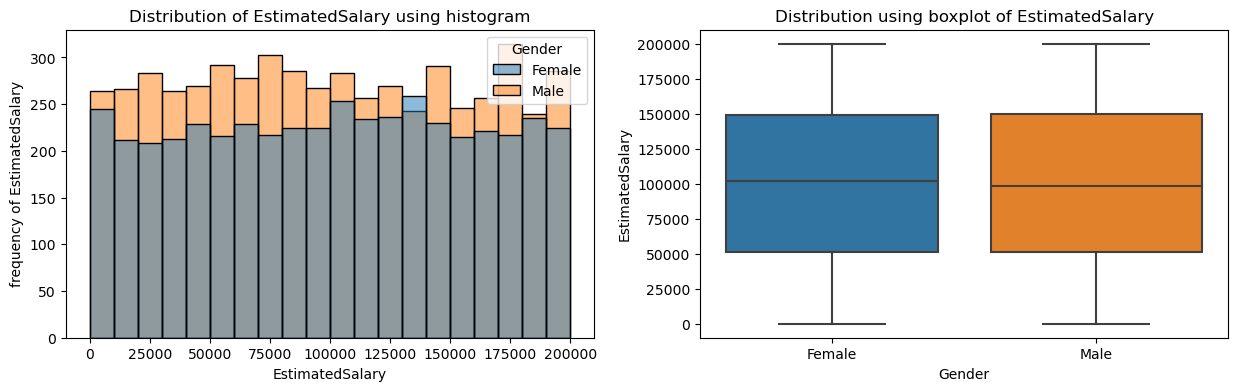

In [159]:
hist_box1("EstimatedSalary")

In [160]:
def hist_box2(*s):
    for col in s:
        values=bank_data[col].values
        fig,ax=plt.subplots(1,2,figsize=(15,4))
        sns.histplot(x=values,hue="IsActiveMember",bins=20,ax=ax[0],data=bank_data)
        ax[0].set_title(f"Distribution of {col} using histogram")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")


        sns.boxplot(y=col,x="IsActiveMember",ax=ax[1],data=bank_data)
        ax[1].set_title(f"Distribution using boxplot of {col}")
        plt.show()

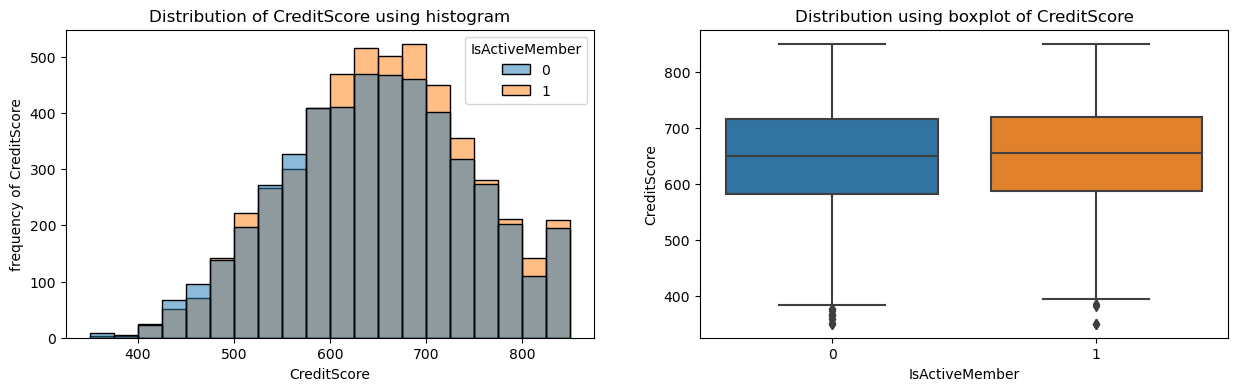

In [161]:
hist_box2("CreditScore")

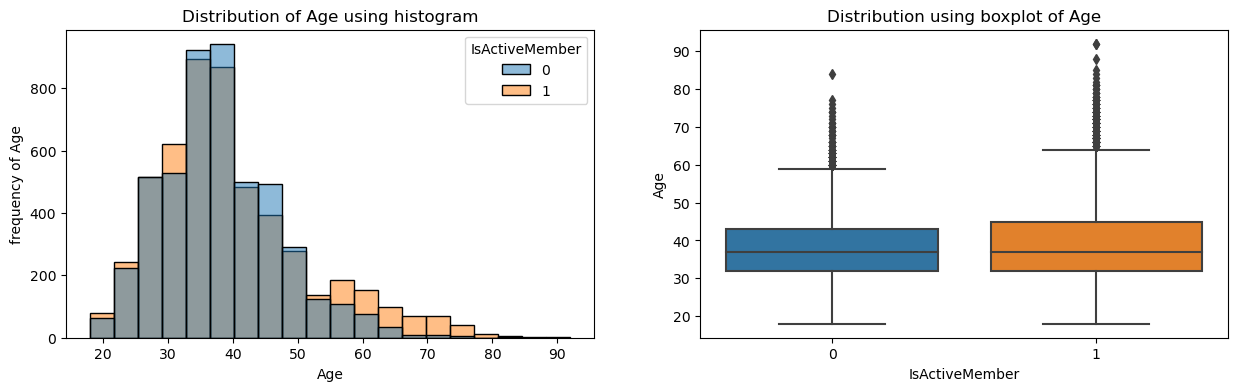

In [162]:
hist_box2("Age")

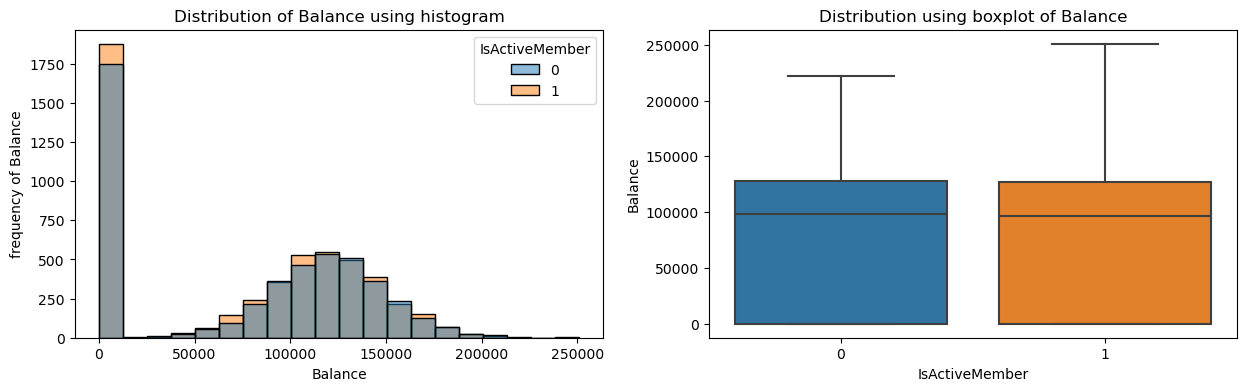

In [163]:
hist_box2("Balance")

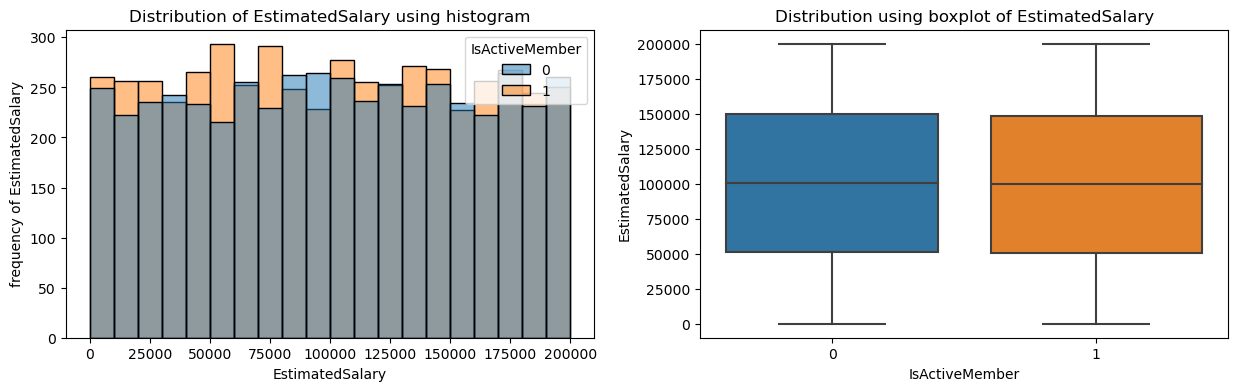

In [164]:
hist_box2("EstimatedSalary")

### Feature Selection

In [165]:
for col in bank_data.select_dtypes("object"):
    bank_data[col]=LabelEncoder().fit_transform(bank_data[col])
    

In [166]:
bank_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


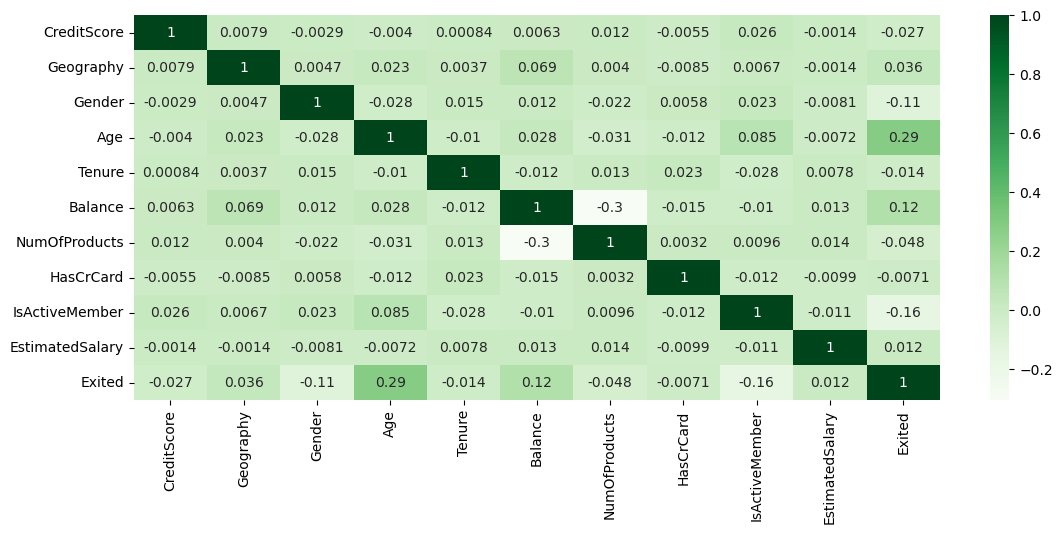

In [167]:
correlation_matrix=bank_data.corr()
plt.figure(figsize=(13,5))
sns.heatmap(correlation_matrix,annot=True,cmap="Greens")
plt.show()

In [168]:
bank_data.drop("HasCrCard",axis=1,inplace=True)

In [169]:
A=bank_data.drop(["Exited"],axis=1)

In [170]:
scaled_data=pd.DataFrame(StandardScaler().fit_transform(A),columns=A.columns)

In [171]:
scaled_data["Exited"]=bank_data["Exited"]
scaled_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.970243,0.021886,1
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,0.970243,0.216534,0
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,-1.030670,0.240687,1
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.030670,-0.108918,0
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.970243,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,-1.030670,-0.066419,0
9996,-1.391939,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.970243,0.027988,0
9997,0.604988,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,0.970243,-1.008643,1
9998,1.256835,0.306591,0.912419,0.293517,-0.695982,-0.022608,0.807737,-1.030670,-0.125231,1


In [172]:
X=scaled_data.drop(["Exited"],axis=1)
y=scaled_data["Exited"]

### Balancing data by Over sampling(SMOTE)

In [173]:
sm=SMOTE(random_state=42)
X_bal,y_bal=sm.fit_resample(X,y)

In [174]:
bal_scaled_data=X_bal.copy()
bal_scaled_data["Exited"]=y_bal
bal_scaled_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.970243,0.021886,1
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,0.970243,0.216534,0
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,-1.030670,0.240687,1
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.030670,-0.108918,0
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.970243,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...
15921,0.427963,-0.880188,0.912419,0.763437,-1.393746,0.282860,2.527057,-1.030670,0.995972,1
15922,-2.194009,0.306591,0.912419,1.914528,0.587290,0.787676,-0.911583,-1.030670,-0.808173,1
15923,0.639077,0.306591,0.912419,-0.373958,-1.245496,0.566166,-0.911583,0.970243,1.461797,1
15924,0.277272,0.758000,-1.095988,0.638197,-1.170920,-0.057925,4.246377,-1.030670,-0.776942,1


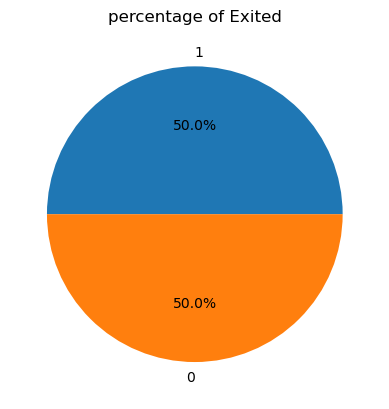

In [175]:
per=bal_scaled_data["Exited"].value_counts(normalize=True)*100
plt.pie(per.values,labels=per.index,autopct="%1.1f%%")
plt.title("percentage of Exited")
plt.show()

### Data Splitting

In [176]:
x_train,x_test,y_train,y_test=train_test_split(X_bal,y_bal,test_size=0.2,random_state=42)

In [177]:
kf=KFold(n_splits=5,shuffle=True, random_state=42)

### Metrics value collection

In [178]:
accuracy_train=[]
accuracy_test=[]
precision=[]
recall=[]
f1_scores=[]
def metrics(model):
    accuracy_train.append(ACCURACY_TRAIN)
    accuracy_test.append(ACCURACY_TEST)
    precision.append(PRECISION)
    recall.append(RECALL)
    f1_scores.append(F1_SCORE)
    

In [179]:
def metrics_print(model):
    print("Model accuracy score on training data :",model.score(x_train,y_train))
    average_accuracy_score_train.append(model.score(x_train,y_train))

    print("Model accuracy score on test data :",model.score(x_test,y_test))
    average_accuracy_score_test.append(model.score(x_test,y_test))

    print()
    PREC=precision_score(y_test,y_pred)
    print("Model precision_score :",PREC)
    avg_prec.append(PREC)

    RCL=recall_score(y_test,y_pred)
    print("Model recall_score :",RCL)
    avg_recall.append(RCL)

    F1=f1_score(y_test,y_pred)
    print("Model f1_score:",F1)
    avg_f1.append(F1)

    print("Model confusion matrix on test data :")
    plt.figure(figsize=(5,2))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
    plt.show()
    print()
    print("Model classification matrix on test data :\n",classification_report(y_test,y_pred))
    print("--"*50)


In [180]:
def metrics_print1(model):
    
    ACCURACY_TRAIN=model.score(x_train,y_train)
    print("Model accuracy score on training data :",ACCURACY_TRAIN)
    
    ACCURACY_TEST=model.score(x_test,y_test)
    print("Model accuracy score on test data :",ACCURACY_TEST)
    print()

    PRECISION=precision_score(y_test,y_pred)
    print("Model precision_score :",PRECISION)

    RECALL=recall_score(y_test,y_pred)
    print("Model recall_score :",RECALL)

    F1_SCORE=f1_score(y_test,y_pred)
    print("Model f1_score:",F1_SCORE)
    print()

    print("Model confusion matrix on test data :")
    plt.figure(figsize=(5,2))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
    plt.show()

    print()

    print("Model classification matrix on test data :\n",classification_report(y_test,y_pred))
    accuracy_train.append(ACCURACY_TRAIN)
    accuracy_test.append(ACCURACY_TEST)
    precision.append(PRECISION)
    recall.append(RECALL)
    f1_scores.append(F1_SCORE)

## ROC & AUC curve

In [212]:
auc_scores=[]
def ROC(model):
    log_prob=model.predict_proba(x_test)
    log_prob=log_prob[:,1]
    r_prob=[0 for _ in range (len(y_test))]

    fpr,tpr,threshold=roc_curve(y_test,log_prob)
    auc=roc_auc_score(y_test,log_prob)

    r_fpr,r_tpr,threshold=roc_curve(y_test,r_prob)
    r_auc=roc_auc_score(y_test,r_prob)

    plt.plot(fpr,tpr,label="auc={:2f}".format(auc))
    plt.plot(r_fpr,r_tpr,label="r_auc={:2f}".format(r_auc))

    plt.plot([0,1],[0,1],"k--")
    plt.legend()
    plt.show()
    auc_scores.append(auc)

# ---------------------------------------------Model Creation----------------------------------------------

### Logistic Regression

Intercept: [-0.28491176]
slope: [[-0.07307586  0.08698872 -0.29539551  0.9111357  -0.02592485  0.33210307
  -0.04417124 -0.46437643  0.01979858]]

Model accuracy score on training data : 0.7054945054945055
Model accuracy score on test data : 0.6989956057752668

Model precision_score : 0.6889312977099237
Model recall_score : 0.6973599484867997
Model f1_score: 0.6931200000000001
Model confusion matrix on test data :


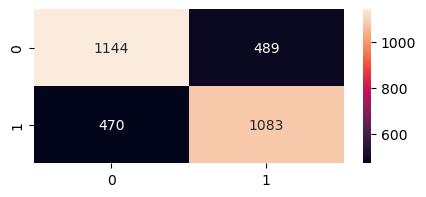


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.71      0.70      0.70      1633
           1       0.69      0.70      0.69      1553

    accuracy                           0.70      3186
   macro avg       0.70      0.70      0.70      3186
weighted avg       0.70      0.70      0.70      3186

----------------------------------------------------------------------------------------------------
Intercept: [-0.29728009]
slope: [[-0.06691058  0.06899743 -0.28481097  0.90372466 -0.04676293  0.3268086
  -0.03162657 -0.47248553  0.02694748]]

Model accuracy score on training data : 0.7036339376815006
Model accuracy score on test data : 0.7054945054945055

Model precision_score : 0.7137330754352031
Model recall_score : 0.6914428482198626
Model f1_score: 0.7024111675126905
Model confusion matrix on test data :


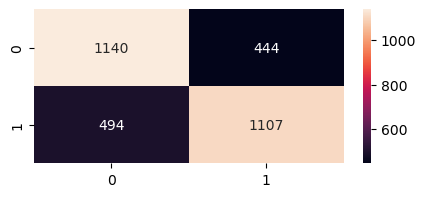


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.70      0.72      0.71      1584
           1       0.71      0.69      0.70      1601

    accuracy                           0.71      3185
   macro avg       0.71      0.71      0.71      3185
weighted avg       0.71      0.71      0.71      3185

----------------------------------------------------------------------------------------------------
Intercept: [-0.29066318]
slope: [[-0.04439184  0.07923644 -0.27781622  0.86790221 -0.02338805  0.34306025
  -0.04412048 -0.47447524  0.02846893]]

Model accuracy score on training data : 0.6993956518326662
Model accuracy score on test data : 0.7111459968602826

Model precision_score : 0.7122671804752729
Model recall_score : 0.7014547754585705
Model f1_score: 0.7068196303377948
Model confusion matrix on test data :


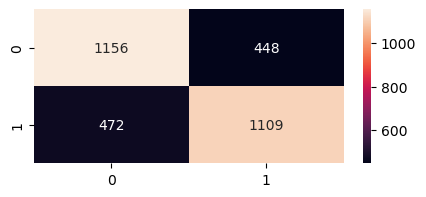


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.71      0.72      0.72      1604
           1       0.71      0.70      0.71      1581

    accuracy                           0.71      3185
   macro avg       0.71      0.71      0.71      3185
weighted avg       0.71      0.71      0.71      3185

----------------------------------------------------------------------------------------------------
Intercept: [-0.30023344]
slope: [[-0.04372925  0.08869794 -0.28591625  0.91863514 -0.01476071  0.32022698
  -0.04963586 -0.46858066  0.0393064 ]]

Model accuracy score on training data : 0.7058315673808964
Model accuracy score on test data : 0.6941915227629514

Model precision_score : 0.7028571428571428
Model recall_score : 0.6862988220706757
Model f1_score: 0.694479297365119
Model confusion matrix on test data :


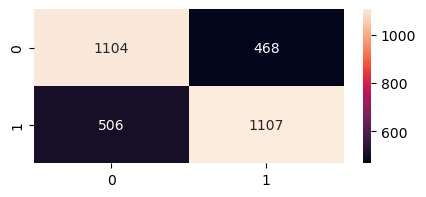


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.69      0.70      0.69      1572
           1       0.70      0.69      0.69      1613

    accuracy                           0.69      3185
   macro avg       0.69      0.69      0.69      3185
weighted avg       0.69      0.69      0.69      3185

----------------------------------------------------------------------------------------------------
Intercept: [-0.29871426]
slope: [[-0.05051913  0.072777   -0.28020211  0.89718746 -0.00874504  0.33859561
  -0.0395204  -0.46373613  0.04881283]]

Model accuracy score on training data : 0.7030060434816734
Model accuracy score on test data : 0.7076923076923077

Model precision_score : 0.7150943396226415
Model recall_score : 0.7040247678018576
Model f1_score: 0.7095163806552262
Model confusion matrix on test data :


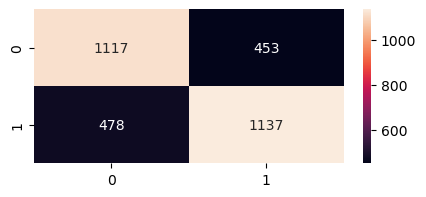


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.70      0.71      0.71      1570
           1       0.72      0.70      0.71      1615

    accuracy                           0.71      3185
   macro avg       0.71      0.71      0.71      3185
weighted avg       0.71      0.71      0.71      3185

----------------------------------------------------------------------------------------------------
Average Accuracy score of test on different K-Fold 0.7035039877170629


In [213]:

average_accuracy_score_train=[]
average_accuracy_score_test=[]
avg_prec=[]
avg_recall=[]
avg_f1=[]
for train_data,test_data in kf.split(bal_scaled_data):
    train,test=bal_scaled_data.iloc[train_data],bal_scaled_data.iloc[test_data]
    x_train=train.drop("Exited",axis=1)
    y_train=train["Exited"]
    
    x_test=test.drop("Exited",axis=1)
    y_test=test["Exited"]
    
    log_model=LogisticRegression().fit(x_train,y_train)
    y_pred=log_model.predict(x_test)
    
    print("Intercept:",log_model.intercept_)
    print("slope:",log_model.coef_)
    print()
    metrics_print(log_model)

lg_ac_train=average_accuracy_score_train.copy()
lg_ac_test=average_accuracy_score_test.copy()
ACCURACY_TRAIN=np.mean(average_accuracy_score_train)
ACCURACY_TEST=np.mean(average_accuracy_score_test)   
print("Average Accuracy score of test on different K-Fold",ACCURACY_TEST)

PRECISION=np.mean(avg_prec) 

RECALL=np.mean(avg_recall) 
F1_SCORE=np.mean(avg_f1) 
metrics(log_model)
    

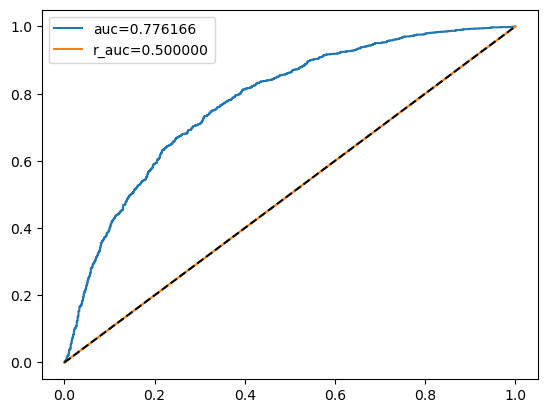

In [214]:
ROC(log_model)

### Naive Baye's Method

Model accuracy score on training data : 0.7482731554160126
Model accuracy score on test data : 0.7435655994978029

Model precision_score : 0.7395833333333334
Model recall_score : 0.7314874436574372
Model f1_score: 0.7355131110391714
Model confusion matrix on test data :


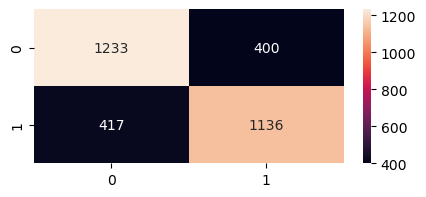


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.75      0.76      0.75      1633
           1       0.74      0.73      0.74      1553

    accuracy                           0.74      3186
   macro avg       0.74      0.74      0.74      3186
weighted avg       0.74      0.74      0.74      3186

----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.7485283729691546
Model accuracy score on test data : 0.7434850863422292

Model precision_score : 0.756544502617801
Model recall_score : 0.722048719550281
Model f1_score: 0.7388942154042825
Model confusion matrix on test data :


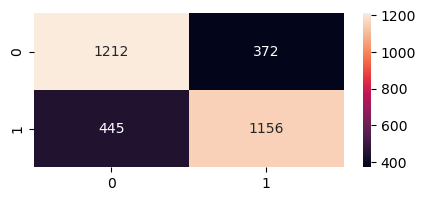


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.73      0.77      0.75      1584
           1       0.76      0.72      0.74      1601

    accuracy                           0.74      3185
   macro avg       0.74      0.74      0.74      3185
weighted avg       0.74      0.74      0.74      3185

----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.7430342987206656
Model accuracy score on test data : 0.7554160125588697

Model precision_score : 0.7597150259067358
Model recall_score : 0.7419354838709677
Model f1_score: 0.7507199999999999
Model confusion matrix on test data :


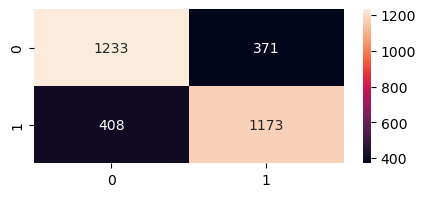


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      1604
           1       0.76      0.74      0.75      1581

    accuracy                           0.76      3185
   macro avg       0.76      0.76      0.76      3185
weighted avg       0.76      0.76      0.76      3185

----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.7479789655443058
Model accuracy score on test data : 0.7444270015698587

Model precision_score : 0.7542966263526416
Model recall_score : 0.7346559206447613
Model f1_score: 0.7443467336683417
Model confusion matrix on test data :


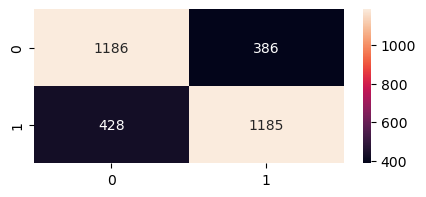


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1572
           1       0.75      0.73      0.74      1613

    accuracy                           0.74      3185
   macro avg       0.74      0.74      0.74      3185
weighted avg       0.74      0.74      0.74      3185

----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.7482929126442195
Model accuracy score on test data : 0.7494505494505495

Model precision_score : 0.7630392788151964
Model recall_score : 0.7337461300309598
Model f1_score: 0.7481060606060608
Model confusion matrix on test data :


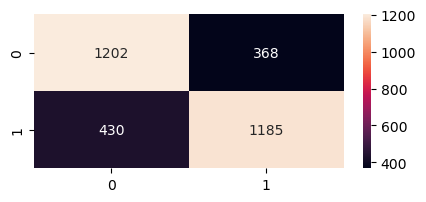


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.74      0.77      0.75      1570
           1       0.76      0.73      0.75      1615

    accuracy                           0.75      3185
   macro avg       0.75      0.75      0.75      3185
weighted avg       0.75      0.75      0.75      3185

----------------------------------------------------------------------------------------------------
Average Accuracy score of test on different K-Fold 0.747268849883862


In [215]:
average_accuracy_score_train=[]
average_accuracy_score_test=[]
avg_prec=[]
avg_recall=[]
avg_f1=[]

for train_data,test_data in kf.split(bal_scaled_data):
    train,test=bal_scaled_data.iloc[train_data],bal_scaled_data.iloc[test_data]
    x_train=train.drop("Exited",axis=1)
    y_train=train["Exited"]
    
    x_test=test.drop("Exited",axis=1)
    y_test=test["Exited"]
    
    gss_model=GaussianNB().fit(x_train,y_train)
    y_pred=gss_model.predict(x_test)
    
    metrics_print(gss_model)
    
nv_ac_train=average_accuracy_score_train.copy()
nv_ac_test=average_accuracy_score_test.copy()
    
ACCURACY_TRAIN=np.mean(average_accuracy_score_train)
ACCURACY_TEST=np.mean(average_accuracy_score_test)
print("Average Accuracy score of test on different K-Fold",ACCURACY_TEST)

PRECISION=np.mean(avg_prec)  
RECALL=np.mean(avg_recall) 
F1_SCORE=np.mean(avg_f1) 
metrics(gss_model)
    

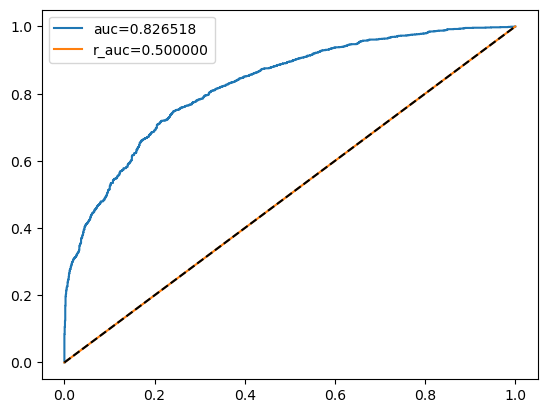

In [216]:
ROC(gss_model)

### Decision Tree Classifier

In [187]:
x_train,x_test,y_train,y_test=train_test_split(X_bal,y_bal,test_size=0.2,random_state=42)

In [188]:
param_grid={'min_samples_split':np.arange(10,51,10),
           'min_samples_leaf':np.arange(10,101,20),
           'max_depth':np.arange(3,10)}

In [189]:
dt=DecisionTreeClassifier()

In [73]:
grid_cv=GridSearchCV(dt,param_grid,scoring="accuracy",cv=kf)

In [72]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50])},
             scoring='accuracy')

In [63]:
grid_cv.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [217]:
dt_model=DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=40).fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

Model accuracy score on training data : 0.8203437720744055
Model accuracy score on test data : 0.8113029827315542

Model precision_score : 0.8744460856720827
Model recall_score : 0.7331269349845201
Model f1_score: 0.7975749410575951

Model confusion matrix on test data :


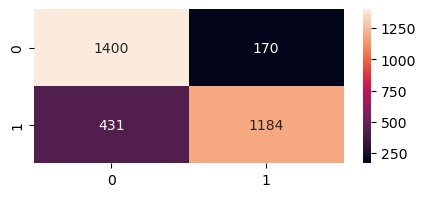


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.76      0.89      0.82      1570
           1       0.87      0.73      0.80      1615

    accuracy                           0.81      3185
   macro avg       0.82      0.81      0.81      3185
weighted avg       0.82      0.81      0.81      3185



In [218]:
metrics_print1(dt_model)

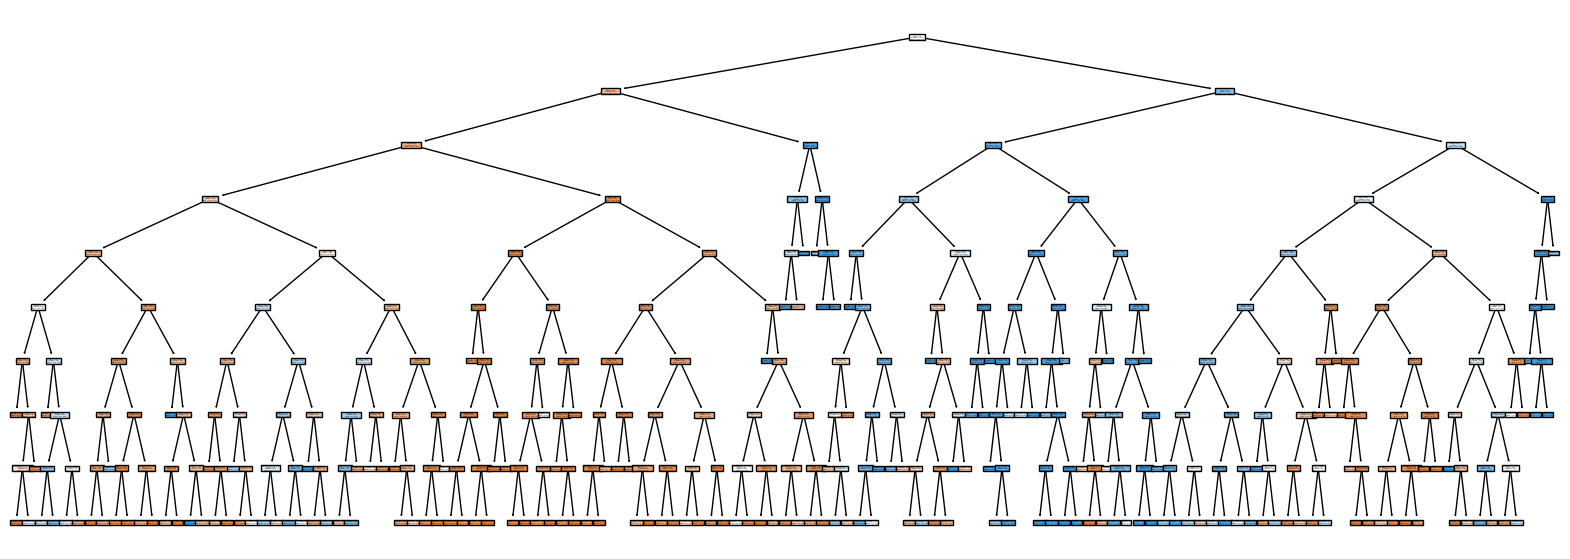

In [92]:
plt.figure(figsize=(20,7))
tree.plot_tree(dt_model,feature_names=X_bal.columns,filled=True)
plt.show()

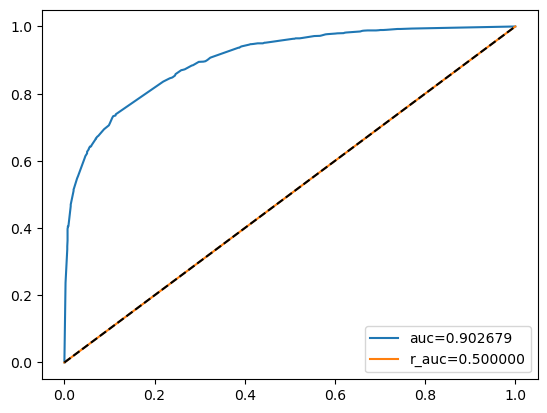

In [219]:
ROC(dt_model)

### Random Forest Classifier

In [193]:
param_grid={'n_estimators':np.arange(20,101,20),
           'min_samples_split':np.arange(10,51,10),
           'min_samples_leaf':np.arange(3,10),
           'max_depth':np.arange(3,10)}

In [194]:
rf=RandomForestClassifier()

In [195]:
grid_cv=GridSearchCV(rf,param_grid,scoring="accuracy",cv=kf)

In [80]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([10, 20, 30, 40, 50]),
                         'n_estimators': array([ 20,  40,  60,  80, 100])},
             scoring='accuracy')

In [82]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=20)

In [220]:
rf_model=RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=20,
                                n_estimators=60,random_state=42).fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

Model accuracy score on training data : 0.862491170237815
Model accuracy score on test data : 0.8304552590266876

Model precision_score : 0.8492527615334633
Model recall_score : 0.8092879256965945
Model f1_score: 0.8287888395688016

Model confusion matrix on test data :


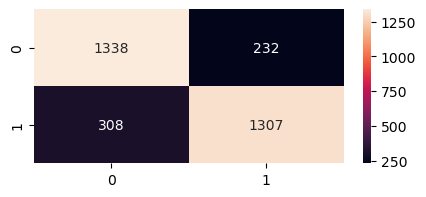


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1570
           1       0.85      0.81      0.83      1615

    accuracy                           0.83      3185
   macro avg       0.83      0.83      0.83      3185
weighted avg       0.83      0.83      0.83      3185



In [221]:
metrics_print1(rf_model)

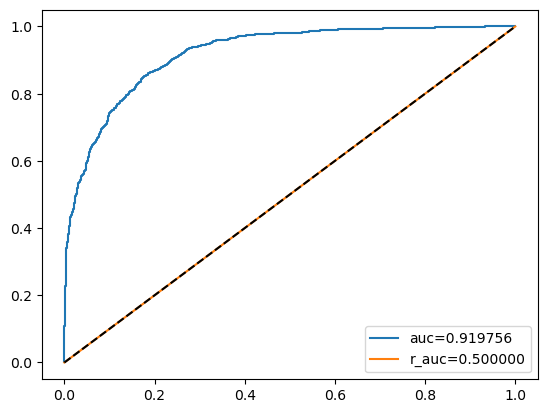

In [222]:
ROC(rf_model)

## Adaboost Classifier

In [199]:
param_grid={"n_estimators": np.arange(10,101,10),
           "learning_rate":np.arange(0.05,1,0.05)}

In [200]:
ada=AdaBoostClassifier()

In [201]:
grid_cv=GridSearchCV(ada,param_grid,scoring="accuracy",cv=kf)

In [88]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='accuracy')

In [89]:
grid_cv.best_estimator_

AdaBoostClassifier(learning_rate=0.9500000000000001, n_estimators=100)

In [223]:
ada_model=AdaBoostClassifier(learning_rate=0.9500000000000001, n_estimators=100).fit(x_train,y_train)
y_pred=ada_model.predict(x_test)

Model accuracy score on training data : 0.8412212542186641
Model accuracy score on test data : 0.8339089481946624

Model precision_score : 0.8471867007672634
Model recall_score : 0.8204334365325078
Model f1_score: 0.8335954702736711

Model confusion matrix on test data :


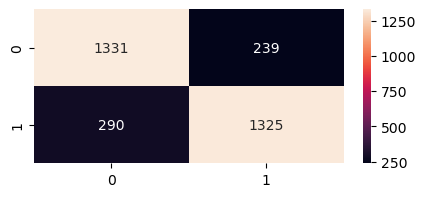


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1570
           1       0.85      0.82      0.83      1615

    accuracy                           0.83      3185
   macro avg       0.83      0.83      0.83      3185
weighted avg       0.83      0.83      0.83      3185



In [224]:
metrics_print1(ada_model)

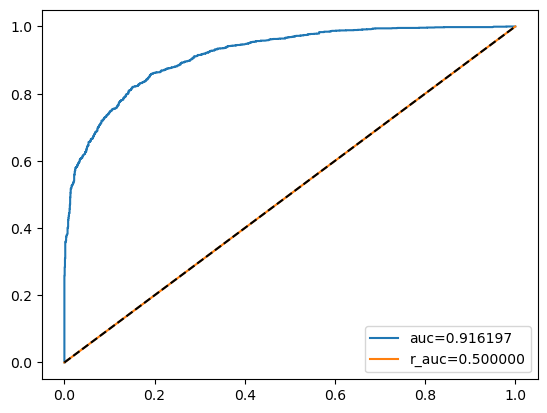

In [225]:
ROC(ada_model)

### K Nearest Neighbor

In [90]:
accuracy_scores=[]
for k in range(100,130):
    knn_score=cross_val_score(KNeighborsClassifier(k),x_train,y_train,scoring="accuracy",cv=kf)
    accuracy_scores.append(np.mean(knn_score))

KeyboardInterrupt: 

In [107]:
for k in range(100,130):
    print("number of neighbors:",k,":",round(accuracy_scores[k-100],4))

number of neighbors: 100 : 0.7651
number of neighbors: 101 : 0.7649
number of neighbors: 102 : 0.7652
number of neighbors: 103 : 0.7651
number of neighbors: 104 : 0.7652
number of neighbors: 105 : 0.7648
number of neighbors: 106 : 0.7656
number of neighbors: 107 : 0.7637
number of neighbors: 108 : 0.7651
number of neighbors: 109 : 0.7632
number of neighbors: 110 : 0.7644
number of neighbors: 111 : 0.7637
number of neighbors: 112 : 0.764
number of neighbors: 113 : 0.7633
number of neighbors: 114 : 0.7626
number of neighbors: 115 : 0.7622
number of neighbors: 116 : 0.7626
number of neighbors: 117 : 0.7619
number of neighbors: 118 : 0.7624
number of neighbors: 119 : 0.7618
number of neighbors: 120 : 0.7621
number of neighbors: 121 : 0.7623
number of neighbors: 122 : 0.762
number of neighbors: 123 : 0.7613
number of neighbors: 124 : 0.7616
number of neighbors: 125 : 0.7615
number of neighbors: 126 : 0.7615
number of neighbors: 127 : 0.7615
number of neighbors: 128 : 0.7619
number of neighb

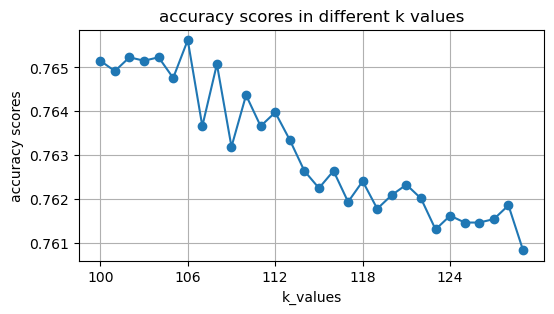

In [108]:
plt.figure(figsize=(6,3))
plt.plot(range(100,130),accuracy_scores,marker="o")
plt.ylabel("accuracy scores")
plt.xlabel("k_values")
plt.title("accuracy scores in different k values")
plt.xticks(range(100,130,6))
plt.grid()
plt.show()

In [226]:
k=106
knn_model=KNeighborsClassifier(k).fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

Model accuracy score on training data : 0.773094733537399
Model accuracy score on test data : 0.7654631083202512

Model precision_score : 0.7646341463414634
Model recall_score : 0.7764705882352941
Model f1_score: 0.7705069124423964

Model confusion matrix on test data :


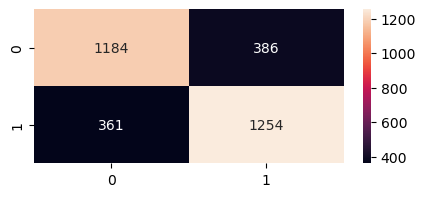


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      1570
           1       0.76      0.78      0.77      1615

    accuracy                           0.77      3185
   macro avg       0.77      0.77      0.77      3185
weighted avg       0.77      0.77      0.77      3185



In [227]:
metrics_print1(knn_model)

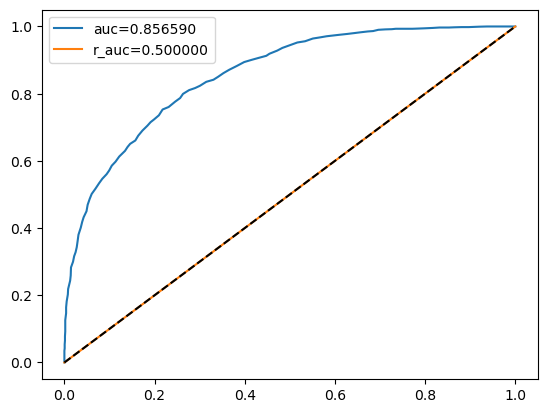

In [228]:
ROC(knn_model)

### Stacked Classifier

In [229]:
level1=[]
level1.append(("lr",LogisticRegression()))
level1.append(("gss",GaussianNB()))
level1.append(("dt",DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=40)))
level1.append(("rf",RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=20,
                                n_estimators=60,random_state=42)))
level1.append(("ada",AdaBoostClassifier(learning_rate=0.9500000000000001, n_estimators=100)))
level1.append(("knn",KNeighborsClassifier(106)))
level1.append(("svm",SVC()))

level2=LogisticRegression()

In [230]:
stack_model=StackingClassifier(estimators=level1,final_estimator=level2,cv=kf).fit(x_train,y_train)
y_pred=stack_model.predict(x_test)

Model accuracy score on training data : 0.875519974884232
Model accuracy score on test data : 0.8427001569858713

Model precision_score : 0.8579691516709511
Model recall_score : 0.826625386996904
Model f1_score: 0.8420056764427625

Model confusion matrix on test data :


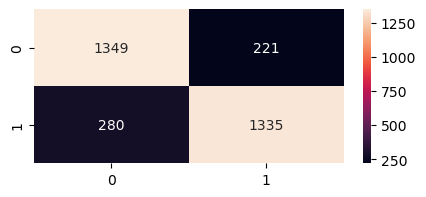


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1570
           1       0.86      0.83      0.84      1615

    accuracy                           0.84      3185
   macro avg       0.84      0.84      0.84      3185
weighted avg       0.84      0.84      0.84      3185



In [231]:
metrics_print1(stack_model)

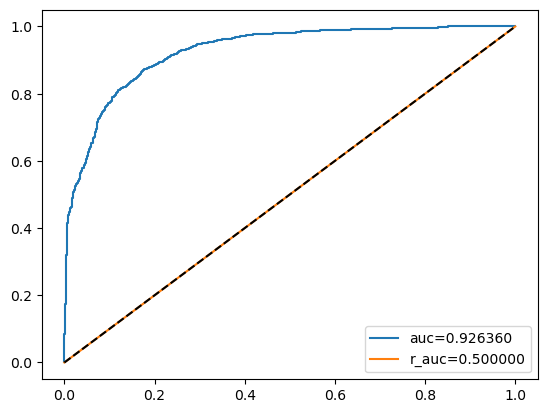

In [232]:
ROC(stack_model)

## Best Model Selection

In [233]:
auc_scores

[0.7761661178048156,
 0.8265181124410877,
 0.9026794975449113,
 0.9197558715071681,
 0.9161966831653882,
 0.8565896945435902,
 0.9263599613496085]

In [234]:
model_list=["Logistic Regression","Gaussian Model","Decision Tree classifier","Random Forest classifier","Ada-boost classifier","KNN classifier","Stacked classifier"]
metric_list=["Models","Accuracy(train)","Accuracy(test)","Precision","Recall","F1 score","auc_score"]

In [235]:
final_results=pd.DataFrame()
for i in range(0,len(model_list)):
    x=[[model_list[i],accuracy_train[i],accuracy_test[i],precision[i],recall[i],f1_scores[i],auc_scores[i]]]
    new=pd.DataFrame(x)
    final_results=pd.concat([final_results,new],axis=0)
final_results.columns=metric_list
final_results=final_results.reset_index(drop=True)  
final_results

,Models,Accuracy(train),Accuracy(test),Precision,Recall,F1 score,auc_score
0,Logistic Regression,0.703472,0.703504,0.706577,0.696116,0.701269,0.776166
1,Gaussian Model,0.747222,0.747269,0.754636,0.732775,0.743516,0.826518
2,Decision Tree classifier,0.841130,0.813873,0.810479,0.806825,0.808648,0.902679
3,Random Forest classifier,0.861303,0.837414,0.837134,0.827431,0.832254,0.919756
4,Ada-boost classifier,0.840659,0.837728,0.838562,0.826143,0.832306,0.916197
5,KNN classifier,0.775196,0.762712,0.739339,0.792659,0.765071,0.856590
6,Stacked classifier,0.703472,0.703504,0.706577,0.696116,0.701269,0.926360


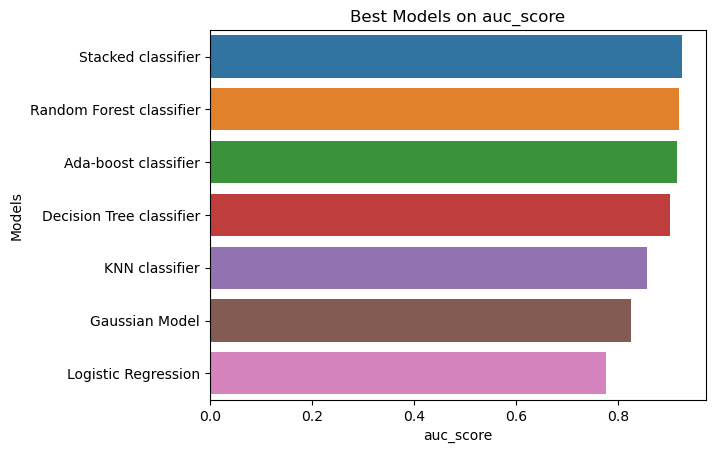

In [236]:
results=final_results.sort_values("auc_score",ascending=False)
sns.barplot(x="auc_score",y="Models",data=results)
plt.title("Best Models on auc_score")
plt.show()

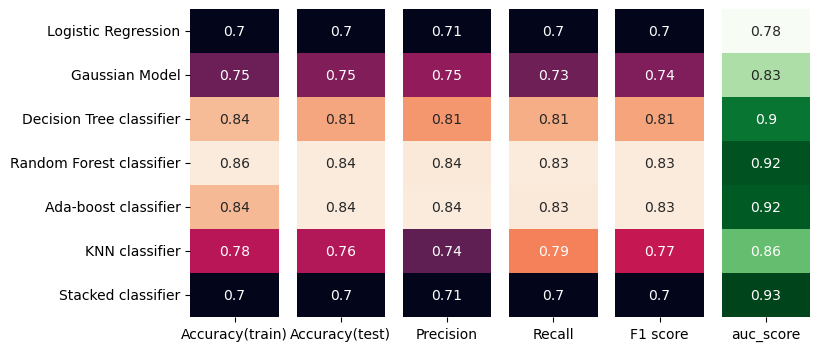

In [237]:
fig,ax=plt.subplots(1,6,figsize=(8,4))

sns.heatmap(final_results[["Accuracy(train)"]],annot=True,yticklabels=model_list,ax=ax[0],cbar=False)
sns.heatmap(final_results[["Accuracy(test)"]],annot=True,ax=ax[1],yticklabels=False,cbar=False)
sns.heatmap(final_results[["Precision"]],annot=True,ax=ax[2],yticklabels=False,cbar=False)
sns.heatmap(final_results[["Recall"]],annot=True,ax=ax[3],yticklabels=False,cbar=False)
sns.heatmap(final_results[["F1 score"]],annot=True,ax=ax[4],yticklabels=False,cbar=False)
sns.heatmap(final_results[["auc_score"]],annot=True,ax=ax[5],yticklabels=False,cbar=False,cmap="Greens")
plt.show()

In [238]:
log_score=lg_ac_test
gss_score=nv_ac_test
dt_score=cross_val_score(dt_model,x_train,y_train,scoring="accuracy",cv=kf)
rf_score=cross_val_score(rf_model,x_train,y_train,scoring="accuracy",cv=kf)
ada_score=cross_val_score(ada_model,x_train,y_train,scoring="accuracy",cv=kf)
knn_score=cross_val_score(knn_model,x_train,y_train,scoring="accuracy",cv=kf)
stack_score=cross_val_score(stack_model,x_train,y_train,scoring="accuracy",cv=kf)

all_scores=[log_score,gss_score,dt_score,rf_score,ada_score,knn_score,stack_score]

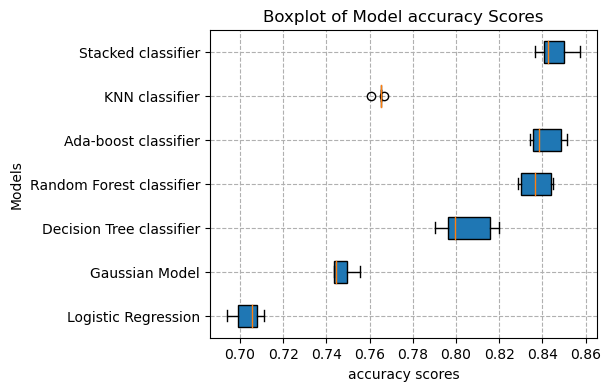

In [239]:
plt.figure(figsize=(5,4))
plt.boxplot(all_scores,labels=model_list,vert=False,patch_artist=True)
plt.title("Boxplot of Model accuracy Scores")
plt.xlabel("accuracy scores")
plt.ylabel("Models")
plt.grid(axis='y', linestyle='--')
plt.grid(axis='x', linestyle='--')
plt.show()